In [1]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
f_rat=pd.read_csv('fdatafile.csv')

In [3]:
f_rat.isna().any()

UserId       False
ProductId    False
Rating       False
Timestamp    False
dtype: bool

In [4]:
clear

In [5]:
f_rat=f_rat.dropna()

In [6]:
f_rat.tail(34)

,UserId,ProductId,Rating,Timestamp
2023036,A2KMP4LQ5FB7PW,B00LLPT4HI,5.0,1405641600
2023037,A1BKT6LV2SEN28,B00LLPT4HI,5.0,1406073600
2023038,A35Q0RBM3YNQNF,B00LLPT4HI,5.0,1405468800
2023039,A2NYK9KWFMJV4Y,B00LLPT4HI,5.0,1405382400
2023040,A14XVBP38Z8HIY,B00LLPT4HI,5.0,1405555200
2023041,A3JJ53IS8XISMT,B00LLPT4HI,5.0,1405900800
2023042,A3LGT6UZL99IW1,B00LLPT4HI,5.0,1405382400
2023043,ASKZO80Z1RKTR,B00LLPT4HI,5.0,1405209600
2023044,A1A7EBY8XJ46PA,B00LLPT4HI,5.0,1405728000
2023045,A1HQ0KTGWQIWYI,B00LLPT4HI,5.0,1405900800


In [7]:
print(f"The rows and The Columns: {f_rat.shape}")

The rows and The Columns: (2023070, 4)


In [8]:
famous_prducts = pd.DataFrame(f_rat.groupby('ProductId')['Rating'].count())

In [9]:
widely_famous=famous_prducts.sort_values('Rating',ascending=False)

In [10]:
widely_famous.head(33)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: title={'center': 'Widely popluar Products'}, ylabel='Frequency'>

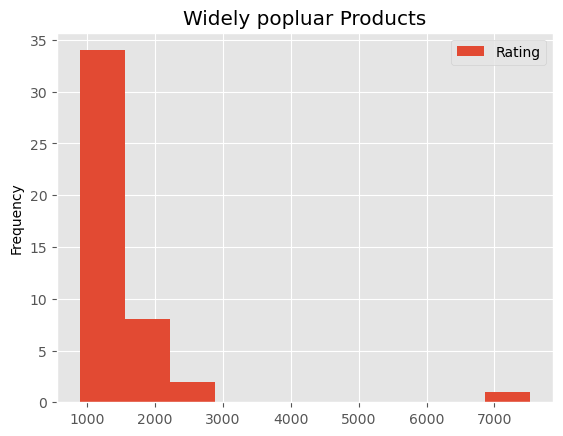

In [11]:
widely_famous.head(45).plot(kind="hist",title="Widely popluar Products",xlabel="y",ylabel="x")

In [12]:
#Utility matrix factorization

In [13]:
f_rat1=f_rat.head(10000)

In [14]:
r_uti_matrix=f_rat1.pivot_table(values='Rating',index="UserId",columns="ProductId",fill_value=0)

In [15]:
r_uti_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Its all sparce

In [17]:
#Now we'll know the shape


In [18]:
r_uti_matrix.shape

(9697, 886)

In [19]:
X_rat=r_uti_matrix.T

In [20]:
X_rat.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_rat.shape

(886, 9697)

In [22]:
X_rat1=X_rat



In [23]:
# now we will put into the parts

In [24]:
TrunSVD=TruncatedSVD(n_components=10)

In [25]:
decom_matrix=TrunSVD.fit_transform(X_rat)

In [26]:
clear

In [27]:
corr_mat= num.corrcoef(decom_matrix)

In [28]:
decom_matrix.shape

(886, 10)

In [29]:
corr_mat.shape

(886, 886)

In [30]:
#Now we can assume that we are buying any random product

In [31]:
import random


In [32]:
random_number=random.randint(1, 1000)

In [33]:
ran=X_rat.index[random_number]

In [34]:
z=ran

In [35]:
pro_name=list(X_rat.index)

In [36]:
pro_id=pro_name.index(z)

In [37]:
pro_id

499

In [38]:
corr_pid=corr_mat[pro_id]

In [39]:
corr_pid.shape

(886,)

In [40]:
rec_list=list(X_rat.index[corr_pid>0.90])

In [41]:
rec_list.remove(z) # already removed

In [42]:
rec_list[:9] # top ten

['0558925278',
 '1987958179',
 '9742496811',
 '974383785X',
 '9788071163',
 '9790771347',
 '9790771517',
 '9790776403',
 'B000000VP5']

In [43]:
#Here we will use textual clustering analysis given in product description

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [45]:
pro_des = pd.read_csv('pro_desc.csv')
pro_des.shape

(124428, 2)

In [46]:
pro_des = pro_des.dropna()
pro_des.shape
pro_des.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [47]:
pro_des1 = pro_des.head(100)

pro_des1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [48]:
vect = TfidfVectorizer(stop_words='english')
X_rat1 = vect.fit_transform(pro_des1["product_description"])
X_rat1

<100x3416 sparse matrix of type '<class 'numpy.float64'>'
	with 7338 stored elements in Compressed Sparse Row format>

/Users/sumitkumar/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


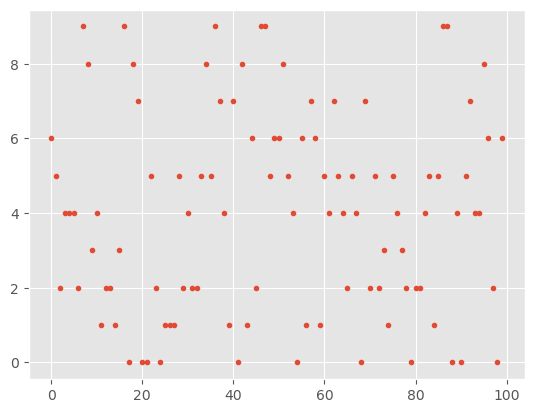

In [49]:
X_rat=X_rat1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X_rat)
plt.plot(y_kmeans, ".")
plt.show()

In [50]:
def write_cls(z):
    print("Cluster %d:" % z),
    for index in order_centroids[z, :10]:
        print(' %s' % terms[index]),
    print

In [51]:
trueK = 10

model = KMeans(n_clusters=trueK, init='k-means++', max_iter=100, n_init=1)
model.fit(X_rat1)

print("Stack top at per terms:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names_out()
for i in range(trueK):
    write_cls(i)

Stack top at per terms:
Cluster 0:
 head
 water
 spray
 watering
 screw
 metal
 sprinkler
 plastic
 adjustable
 heavy
Cluster 1:
 post
 vinyl
 privacy
 cooking
 mount
 shades
 ladder
 fence
 wood
 model
Cluster 2:
 concrete
 used
 applications
 product
 non
 mirror
 stake
 designed
 vary
 wood
Cluster 3:
 frame
 grill
 wicker
 collection
 sturdy
 door
 dining
 weather
 patio
 step
Cluster 4:
 water
 toilet
 solar
 design
 help
 efficiency
 high
 valve
 helps
 flush
Cluster 5:
 insulation
 base
 paint
 primed
 ft
 radiant
 room
 mdf
 used
 install
Cluster 6:
 storage
 wall
 door
 stakes
 metal
 shelves
 clock
 contemporary
 installation
 oven
Cluster 7:
 tape
 sticks
 depot
 rope
 ul
 linkable
 vary
 mower
 loops
 pouch
Cluster 8:
 shade
 bamboo
 pole
 canopy
 clip
 umbrella
 shades
 fencing
 natural
 120
Cluster 9:
 power
 led
 light
 unit
 fixtures
 air
 free
 tool
 cabinet
 plan


In [52]:
def show_rec(pro):
    #print("Cluster ID:")
    Y = vect.transform([pro])
    prediction = model.predict(Y)
    #print(prediction)
    write_cls(prediction[0])

In [53]:
show_rec("tool")

Cluster 9:
 power
 led
 light
 unit
 fixtures
 air
 free
 tool
 cabinet
 plan


In [54]:
show_rec("design")

Cluster 4:
 water
 toilet
 solar
 design
 help
 efficiency
 high
 valve
 helps
 flush


In [55]:
show_rec("screen")

Cluster 2:
 concrete
 used
 applications
 product
 non
 mirror
 stake
 designed
 vary
 wood


In [56]:
clear

In [57]:
show_rec("spline")

Cluster 2:
 concrete
 used
 applications
 product
 non
 mirror
 stake
 designed
 vary
 wood
